In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
df_original = df.copy()

In [2]:
print("Shape:", df.shape)

Shape: (8807, 12)


In [3]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [5]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
df = df.dropna(subset=['country', 'rating', 'duration'])
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['date_added'] = df['date_added'].fillna('Unknown')

In [9]:
print("Shape after cleaning:", df.shape)

Shape after cleaning: (7970, 12)


In [10]:
print("\nRemaining missing values:\n")
print(df.isnull().sum())


Remaining missing values:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [11]:
print(df['type'].unique())

['Movie' 'TV Show']


In [12]:
print(df['type'].value_counts())

type
Movie      5687
TV Show    2283
Name: count, dtype: int64


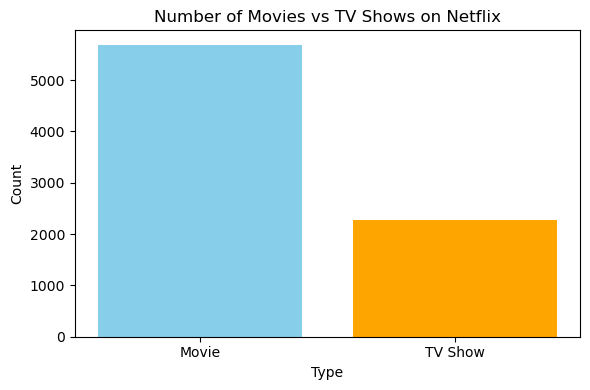

In [13]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
print(df['rating'].unique())
print(df['rating'].value_counts())

['PG-13' 'TV-MA' 'TV-14' 'TV-Y7' 'PG' 'R' 'TV-PG' 'TV-Y' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']
rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64


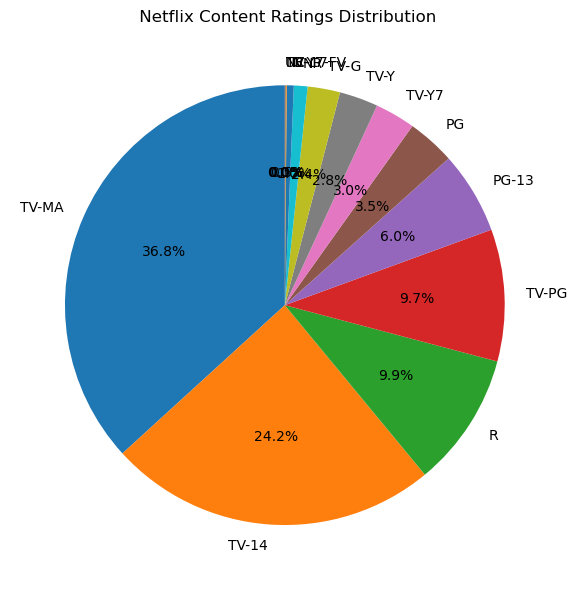

In [15]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(' Netflix Content Ratings Distribution')
plt.tight_layout()
plt.show()

### 🥧 Netflix Content Ratings Distribution

This pie chart shows the percentage of different content ratings available on Netflix.  
It helps identify whether the platform is focused more on mature audiences (TV-MA, R) or family-friendly content (TV-Y, PG).

In [16]:
movie_df = df[df['type'] == 'Movie'].copy()

In [17]:
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

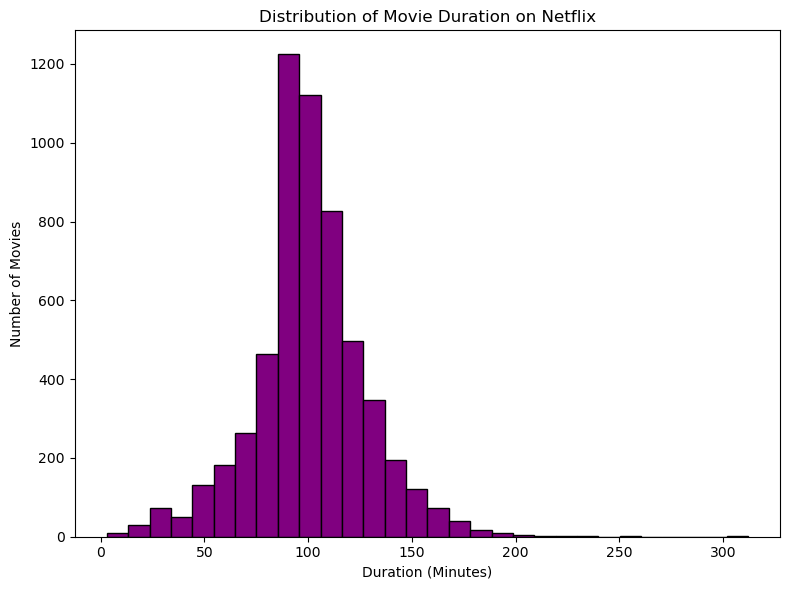

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

### Distribution of Movie Duration

This histogram shows how long most movies on Netflix are.  
We can observe that most movies fall between 80 and 120 minutes, with fewer movies outside this range.


In [19]:
release_counts = df['release_year'].value_counts().sort_index()

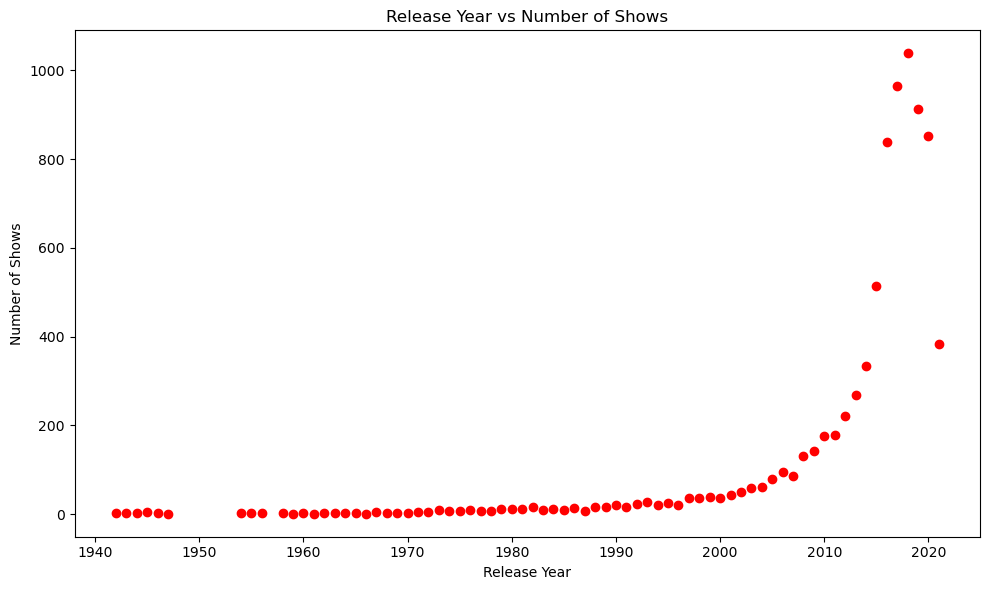

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()

### Release Year vs Number of Shows

This scatter plot shows how many Netflix titles were released each year.  
We can observe a significant increase in content production from 2010 onward, peaking around 2018–2020.


In [21]:
country_counts = df['country'].value_counts().head(10)

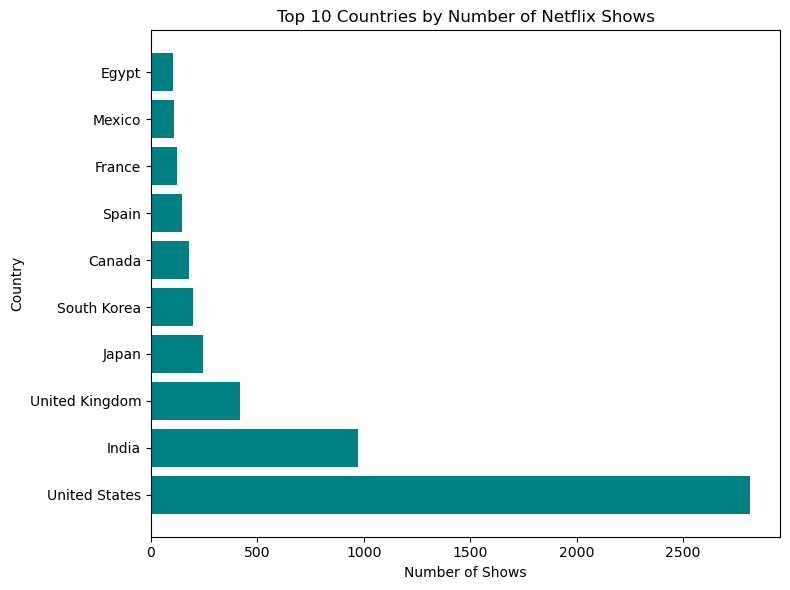

In [22]:
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Netflix Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Top 10 Countries by Number of Netflix Shows

This bar chart highlights the top 10 countries contributing content to Netflix.  
It reveals which regions are most active in media production and have the largest libraries on the platform.


In [23]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

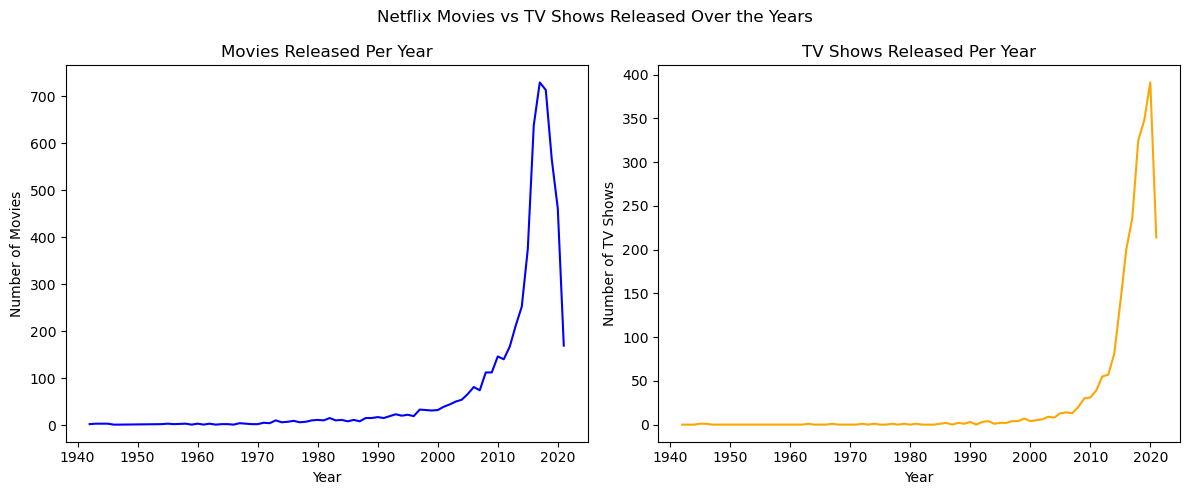

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#  Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#  TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

#  Main title
fig.suptitle('Netflix Movies vs TV Shows Released Over the Years')

plt.tight_layout()
plt.show()

### Netflix Movies vs TV Shows Released Over the Years

This side-by-side line chart compares the yearly release trend of Movies and TV Shows on Netflix.  
We can observe that movie releases were dominant early on, but TV Shows have grown significantly in recent years.
